In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [37]:

ad_data = pd.DataFrame(pd.read_csv("C:\Users\PENGUIN\Desktop\CODSOFT\CODSOFT\Task4-Sales Prediction  Using Python\advertising.csv"))


In [38]:

ad_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [40]:

ad_data_shape = ad_data.shape

In [41]:

ad_data_info = ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [43]:

ad_data_stats = ad_data.describe()

In [45]:

missing_values = ad_data.isnull().sum() * 100 / ad_data.shape[0]


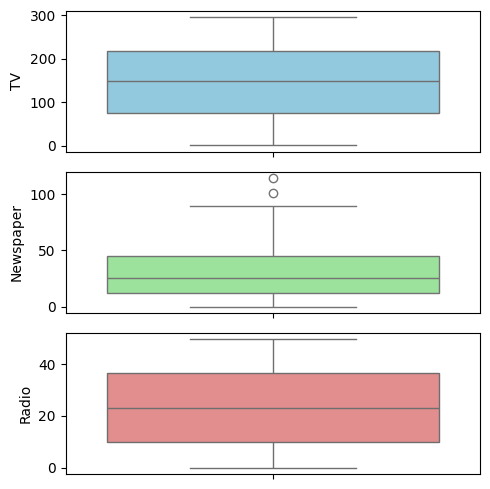

In [46]:

fig, axs = plt.subplots(3, figsize=(5, 5))
plt1 = sns.boxplot(ad_data['TV'], ax=axs[0], color='skyblue')
plt2 = sns.boxplot(ad_data['Newspaper'], ax=axs[1], color='lightgreen')
plt3 = sns.boxplot(ad_data['Radio'], ax=axs[2], color='lightcoral')
plt.tight_layout()

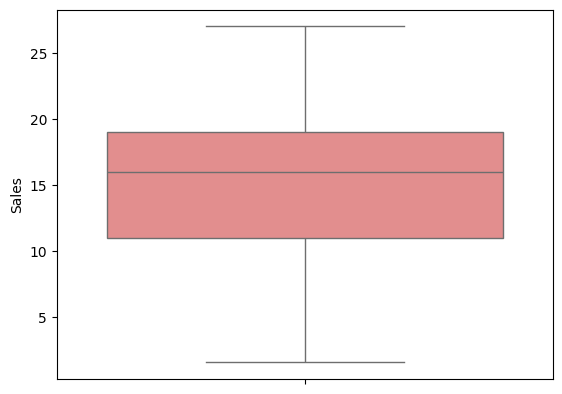

In [47]:

sns.boxplot(ad_data['Sales'], color='lightcoral')
plt.show()

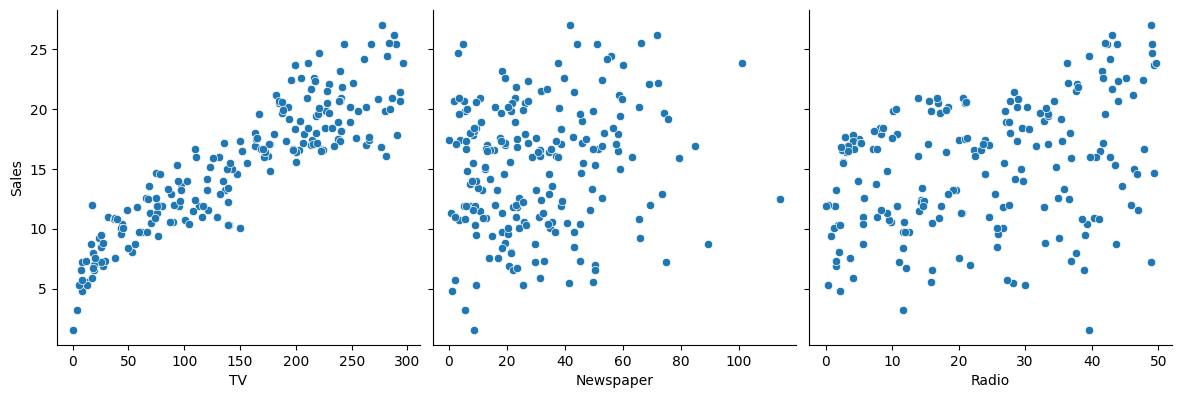

In [48]:
sns.pairplot(ad_data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

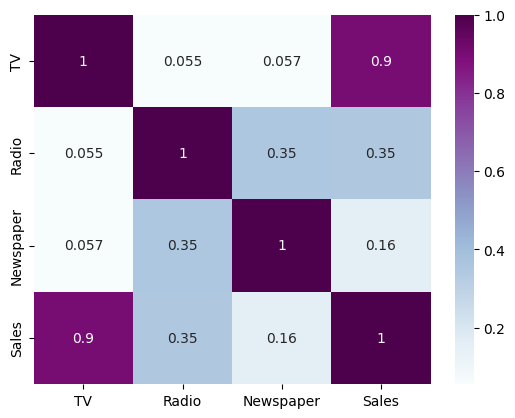

In [49]:
correlation_heatmap = sns.heatmap(ad_data.corr(), cmap="BuPu", annot=True)
plt.show()

In [50]:
feature_X = ad_data['TV']
target_y = ad_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(feature_X, target_y, train_size=0.7, test_size=0.3, random_state=100)


In [51]:
X_train_sm = sm.add_constant(X_train)
linear_model = sm.OLS(y_train, X_train_sm).fit()

In [52]:
linear_model_summary = linear_model.summary()


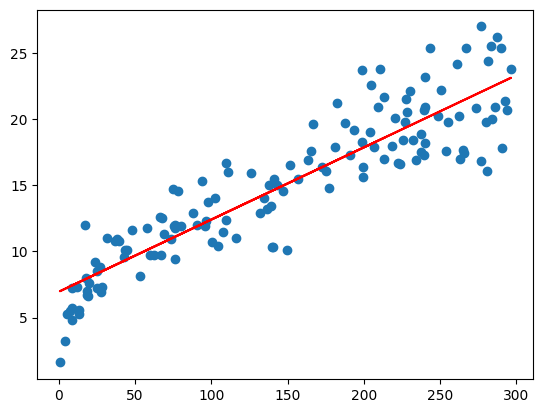

In [53]:
plt.scatter(X_train, y_train)
plt.plot(X_train, linear_model.params[0] + linear_model.params[1] * X_train, 'r')
plt.show()

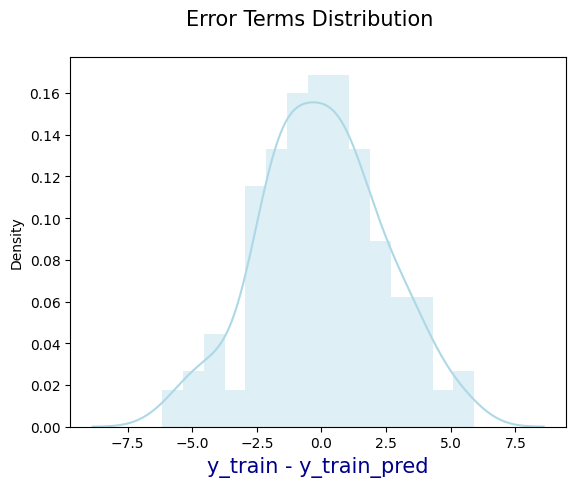

In [56]:
y_train_pred = linear_model.predict(X_train_sm)
residuals = (y_train - y_train_pred)

fig = plt.figure()
error_terms_distribution = sns.distplot(residuals, bins=15, color='lightblue')
fig.suptitle('Error Terms Distribution', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15, color='darkblue')
plt.show()

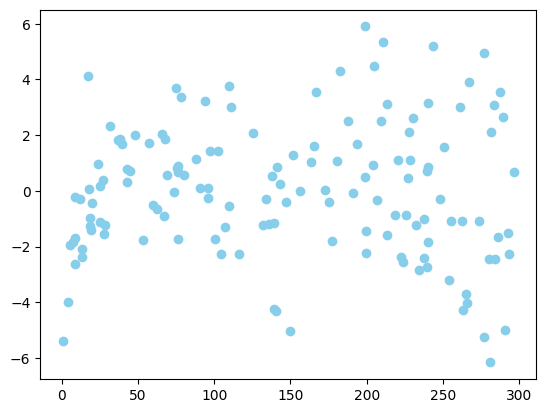

In [57]:
plt.scatter(X_train, residuals, color='skyblue')
plt.show()

In [58]:
X_test_sm = sm.add_constant(X_test)
y_pred = linear_model.predict(X_test_sm)

In [62]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


In [60]:
rmse_r2_results = f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}\nR-squared: {r_squared}"


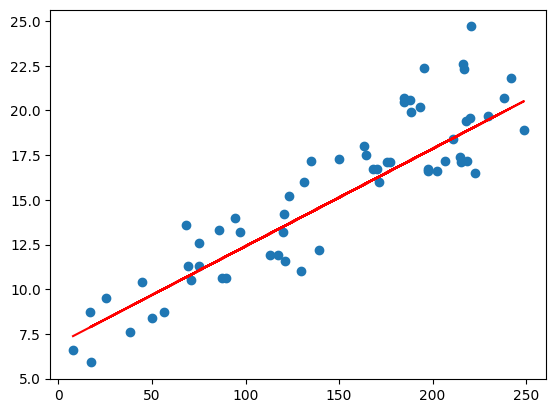

In [61]:
plt.scatter(X_test, y_test)
plt.plot(X_test, linear_model.params[0] + linear_model.params[1] * X_test, 'r')
plt.show()